In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

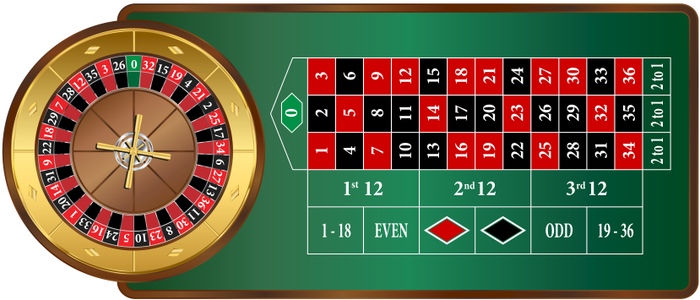

In [4]:
All = set(range(0,37,1))
non_zero = set(range(1,37,1))

Red = set([1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36])
Black = non_zero - Red
Green = set([0])
Odd = set(range(1,37,2))
Even = set(range(2,37,2))

Col1 = set(range(1,13,1))
Col2 = set(range(13,25,1))
Col2 = set(range(25,37,1))

Row1 = set(range(3,37,3))
Row2 = set(range(2,36,3))
Row3 = set(range(1,35,3))

S1_18 = set(range(1,19,1))
s19_36 = set(range(19,37,1))

In [5]:
def roll():
    return random.choice(list(All))

In [6]:
Balance = 10000
Bet_size_black = 10
Bet_size_odd = 10

In [7]:
def play(Balance,Bet_size_black,Bet_size_odd):
    Balance = Balance - Bet_size_black -Bet_size_odd
    no = roll()
    if no in Black:
        br = 2*Bet_size_black
        fb = 0
    else:
        br = 0
        fb = 1
    if no in Odd:
        ro = 2*Bet_size_odd
        fo = 0
    else:
        ro = 0
        fo = 1
    
    
    Balance = Balance + ro + br
    
    return Balance,fb,fo
    

In [8]:
def test_strat(Balance,Bet_size_black,Bet_size_odd,r,stop_loss,ilimit):
    i = 1
    while Balance - Bet_size_black - Bet_size_odd > stop_loss and i<= ilimit:
        Balance,fb,fo = play(Balance,Bet_size_black,Bet_size_odd)
        #print(Balance)
        i += 1
        if fb == 1:
            Bet_size_black = r*Bet_size_black
        if fo == 1:
            Bet_size_odd = r*Bet_size_odd
    return Balance,i

In [9]:
test_strat(1000,1,1,3,700,5)

(1010, 6)

In [10]:
def Strategy_general(Balance,ratio_first,r,stop_loss_ratio,iterations):
    Bet_size_black = ratio_first*Balance
    Bet_size_odd = ratio_first*Balance
    stop_loss = stop_loss_ratio*Balance
    return test_strat(Balance,Bet_size_black,Bet_size_odd,r,stop_loss,iterations)[0]

In [11]:
Strategy_general(1000,.01,3,.7,5)

1160.0

In [55]:
def play_test(games,Balance,ratio_first,r,stop_loss_ratio,iterations):
    M = []
    I = list(range(1,games+1))
    for i in I:
        money = Strategy_general(Balance,ratio_first,r,stop_loss_ratio,iterations)
        M.append(money)
    #chart1 = plt.plot(I,M)
    #sns.distplot(M,bins=50)
    #print("Minimum  : ",np.min(M))
    #print("Maximum : ",np.max(M))
    #print("Mean : ",np.mean(M))
    #print("Std : ",np.std(M))
    
    return M,np.min(M),np.max(M),np.mean(M),np.std(M)

In [56]:
def probability_bet(a,b,L):
    count = 0
    for i in L:
        if i >= a and i <= b:
            count += 1
    return count/len(L)

In [179]:
def play_test_prob_plot(games,Balance,ratio_first,r,stop_loss_ratio,iterations,low,high):
    M,mi,mx,mu,st = play_test(games,Balance,ratio_first,r,stop_loss_ratio,iterations)
    sns.distplot(M,bins=50)
    print("Minimum  : ",np.min(M))
    print("Maximum : ",np.max(M))
    print("Mean : ",np.mean(M))
    print("Std : ",np.std(M))
    probability = probability_bet(low,high,M)
    print("Starting bet on Black :  ",ratio_first*Balance)
    print("Starting bet on Odd :  ",ratio_first*Balance)
    print("Stop Loss Choosen :  ",stop_loss_ratio*Balance)
    print("No of games to be played :  ",iterations)
    print("Probability of ending money between ",low," and ",high," is  :  ",probability)
    print("Probability of ending with more money is   :   ",probability_bet(Balance,mx,M))
    

In [84]:
def play_test_prob(games,Balance,ratio_first,r,stop_loss_ratio,iterations):
    M,mi,mx,mu,st = play_test(games,Balance,ratio_first,r,stop_loss_ratio,iterations)
    probability = probability_bet(Balance,mx,M)
    return probability

Minimum  :  869.8
Maximum :  1060.0
Mean :  997.28229
Std :  40.729253091063434
Starting bet on Black :   10.0
Starting bet on Odd :   10.0
Stop Loss Choosen :   700.0
No of games to be played :   3
Probability of ending money between  1000  and  1500  is  :   0.5825
Probability of ending with more money is   :    0.5825


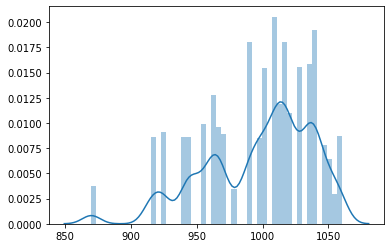

In [180]:
play_test_prob_plot(10000,1000,.01,1.9,.7,3,1000,1500)

In [90]:
def varing_parameter_plot_iterations(games,Balance,ratio_first,r,stop_loss_ratio):
    I = list(range(1,20))
    P = []
    for i in I:
        prob = play_test_prob(games,Balance,ratio_first,r,stop_loss_ratio,i)
        P.append(prob)
    plt.plot(I,P)
    return P

[0.7548,
 0.5297,
 0.6516,
 0.5881,
 0.5239,
 0.4214,
 0.3758,
 0.3367,
 0.3203,
 0.2986,
 0.3092,
 0.3022,
 0.3012,
 0.2981,
 0.2955,
 0.3028,
 0.2987,
 0.3012,
 0.2968]

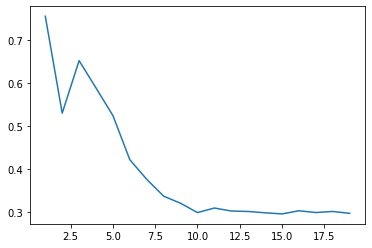

In [93]:
varing_parameter_plot_iterations(10000,1000,.01,2.5,.7)

In [129]:
def varing_parameter_plot_r(games,Balance,ratio_first,stop_loss_ratio,iterations):
    R = np.linspace(2,3.3,50)
    P = []
    for r in R:
        prob = play_test_prob(games,Balance,ratio_first,r,stop_loss_ratio,iterations)
        P.append(prob)
    plt.plot(R,P)
    mx = np.max(P)
    ind = P.index(mx)
    return R[ind],P[ind],P

(2.6897959183673468,
 0.6588,
 [0.622,
  0.5552,
  0.6067,
  0.5922,
  0.6296,
  0.5643,
  0.6145,
  0.5699,
  0.6228,
  0.5984,
  0.6224,
  0.6259,
  0.6184,
  0.5918,
  0.6144,
  0.6304,
  0.6496,
  0.6568,
  0.612,
  0.6489,
  0.594,
  0.6346,
  0.6235,
  0.6537,
  0.6009,
  0.6555,
  0.6588,
  0.6567,
  0.6431,
  0.6506,
  0.647,
  0.6471,
  0.6265,
  0.6202,
  0.6502,
  0.5975,
  0.6478,
  0.6201,
  0.6306,
  0.5729,
  0.6135,
  0.6253,
  0.6209,
  0.5955,
  0.6093,
  0.6208,
  0.627,
  0.611,
  0.6263,
  0.6019])

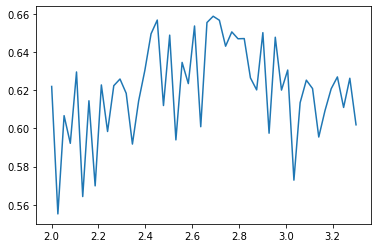

In [130]:
varing_parameter_plot_r(10000,1000,.01,.7,3)

In [141]:
def varing_parameter_plot_sl(games,Balance,ratio_first,r,iterations):
    SL = np.linspace(0.7,.86,30)
    P = []
    for stop_loss_ratio in SL:
        prob = play_test_prob(games,Balance,ratio_first,r,stop_loss_ratio,iterations)
        P.append(prob)
    plt.plot(SL,P)
    mx = np.max(P)
    ind = P.index(mx)
    return SL[ind],P[ind],P

(0.7220689655172413,
 0.6655,
 [0.649,
  0.6592,
  0.6565,
  0.6478,
  0.6655,
  0.6457,
  0.6524,
  0.6525,
  0.6474,
  0.6579,
  0.6568,
  0.6556,
  0.6605,
  0.6597,
  0.6539,
  0.6457,
  0.6376,
  0.6413,
  0.646,
  0.6476,
  0.6401,
  0.6425,
  0.6378,
  0.6404,
  0.6324,
  0.6441,
  0.6446,
  0.6421,
  0.6453,
  0.6406])

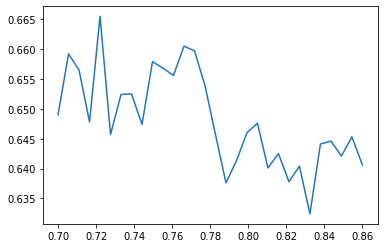

In [144]:
varing_parameter_plot_sl(10000,1000,.01,2.7,3)

In [172]:
def varing_parameter_plot_rf(games,Balance,r,stop_loss_ratio,iterations):
    rf = np.linspace(0.001,.02,50)
    P = []
    for ratio_first in rf:
        prob = play_test_prob(games,Balance,ratio_first,r,stop_loss_ratio,iterations)
        P.append(prob)
    plt.plot(rf,P)
    mx = np.max(P)
    ind = P.index(mx)
    return rf[ind],P[ind],P

(0.0060408163265306125,
 0.6625,
 [0.6038,
  0.6557,
  0.6012,
  0.654,
  0.6465,
  0.6573,
  0.5954,
  0.6563,
  0.6584,
  0.6453,
  0.6014,
  0.5935,
  0.6564,
  0.6625,
  0.5968,
  0.5943,
  0.6601,
  0.615,
  0.6225,
  0.5941,
  0.6004,
  0.6525,
  0.6602,
  0.6575,
  0.5887,
  0.6608,
  0.6575,
  0.612,
  0.6015,
  0.6539,
  0.6562,
  0.5895,
  0.6421,
  0.579,
  0.6509,
  0.6153,
  0.6412,
  0.5995,
  0.633,
  0.6434,
  0.6194,
  0.6058,
  0.6017,
  0.6461,
  0.5852,
  0.6375,
  0.5898,
  0.6397,
  0.6146,
  0.6397])

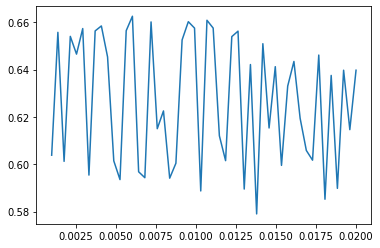

In [173]:
varing_parameter_plot_rf(10000,1000,2.7,.72,3)

Minimum  :  868.1199999999999
Maximum :  1052.7999999999997
Mean :  998.079886
Std :  39.70500820535117
Starting bet on Black :   6.0
Starting bet on Odd :   6.0
Stop Loss Choosen :   720.0
No of games to be played :   3
Probability of ending money between  1000  and  1500  is  :   0.5963
Probability of ending with more money is   :    0.5963


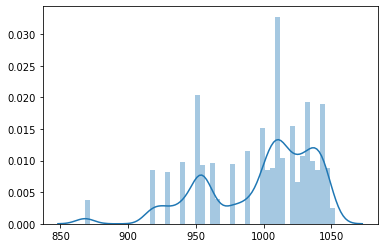

In [186]:
play_test_prob_plot(10000,1000,.006,2.7,.72,3,1000,1500)

In [191]:
def One_Game(Balance,ratio_first,r,stop_loss_ratio,iterations):
    Bet_size_black = ratio_first*Balance
    Bet_size_odd = ratio_first*Balance
    
    for i in range(iterations):
        Balance,fb,fo = play(Balance,Bet_size_black,Bet_size_odd)
        if fb == 1:
            Bet_size_black = r*Bet_size_black
        if fo == 1:
            Bet_size_odd = r*Bet_size_odd
    return Balance

In [192]:
One_Game(1000,.006,2.7,.72,3)

1044.3999999999999

In [251]:
def Many_Games(Ngames,Balance,ratio_first,r,stop_loss_ratio,iterations):
    Bi = Balance
    for i in range(Ngames):
        Balance = One_Game(Balance,ratio_first,r,stop_loss_ratio,iterations)
        if Balance - 2*Balance*ratio_first < stop_loss_ratio*Bi:
            break
    return Balance

In [252]:
Many_Games(2,1000,.006,2.7,.72,3)

1027.54

In [253]:
for i in range(2,10):
    print(Many_Games(3,1000,.006,2.7,.72,3))

904.2081876285041
963.8845366808799
1022.0936503120002
966.7984010607993
952.81668708568
1065.8733342399998
904.1224575407197
1009.9919199999998


In [254]:
def saving(Balance,initial):
    Balance = initial
    Savings = Balance - initial
    return Balance,Savings

In [255]:
def Games_with_savings(Ngames,Balance,ratio_first,r,stop_loss_ratio,iterations):
    Bi = Balance
    Sa = 0
    for i in range(Ngames):
        Balance = One_Game(Balance,ratio_first,r,stop_loss_ratio,iterations)
        if Balance > Bi:
            Sa = Sa + (Balance - Bi)
        if Balance - 2*Balance*ratio_first < stop_loss_ratio*Bi:
            break
    return Balance + Sa

In [256]:
Games_with_savings(20,1000,.006,2.7,.72,3)

1041.5296864081602

In [298]:
def distribution_ngames(distributions,Ngames,Balance,ratio_first,r,stop_loss_ratio,iterations):
    M = []
    for d in range(distributions):
        M.append(Games_with_savings(Ngames,Balance,ratio_first,r,stop_loss_ratio,iterations))
    sns.distplot(M)
    count = 0
    count_mean = 0
    for m in M:
        if m > Balance:
            count += 1
        if m > count_mean:
            count_mean += 1
            
    prob = count/len(M)
    prob_great_mean = count_mean/len(M)
    return np.mean(M),np.std(M),np.min(M),np.max(M),prob,prob_great_mean

(1168.5475638317846,
 302.9722713916908,
 842.6058992122047,
 2672.3667909721444,
 0.60175,
 0.40775)

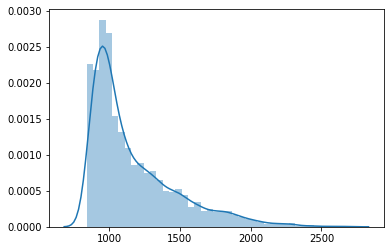

In [343]:
distribution_ngames(4000,10,1000,.008,2.7,.88,2)